# Libraries importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading csv file 

In [2]:
data = pd.read_csv("E:\Bharat Intern\Task-1\spamsms.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Replace missing values with an empty string using notnull
df = data.where((pd.notnull(data)), '')


In [4]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape

(5572, 2)

In [7]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [8]:
X= df['Message']
Y = df['Category']

In [9]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Data Visualisation

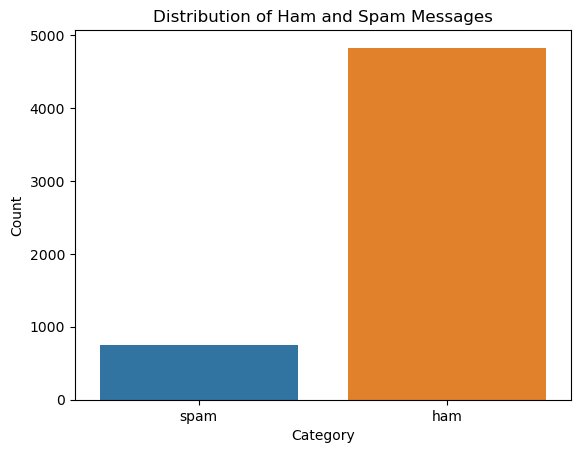

In [39]:
sns.countplot(x='Category', data=df)

# Set x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['spam', 'ham'])

# Add labels and title for better clarity
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')

# Show the plot
plt.show()


# Training & Testing Set

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =3)

In [41]:
X_test.values

array(['URGENT! Your mobile No 077xxx WON a £2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362206 ASAP! BOX97N7QP, 150ppm',
       'Ok i will tell her to stay out. Yeah its been tough but we are optimistic things will improve this month.',
       'Congrats! 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid your mates, play java games, Dload polyPH music, noline rentl.',
       ...,
       'I don wake since. I checked that stuff and saw that its true no available spaces. Pls call the embassy or send a mail to them.',
       'Lol I know! Hey someone did a great inpersonation of flea on the forums. I love it!',
       'K do I need a login or anything'], dtype=object)

In [42]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [43]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


#  CountVectorizer

In [44]:
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train)

In [45]:
print(X_train_count)

  (0, 2390)	1
  (0, 3934)	1
  (0, 2284)	1
  (0, 4594)	1
  (0, 3403)	1
  (0, 5591)	1
  (1, 3934)	1
  (1, 2356)	1
  (1, 7654)	2
  (1, 7454)	1
  (1, 3146)	1
  (1, 2047)	1
  (1, 3053)	1
  (1, 1316)	1
  (1, 7660)	2
  (1, 2845)	1
  (1, 6239)	1
  (1, 6769)	1
  (1, 4909)	1
  (1, 7447)	1
  (1, 3715)	1
  (1, 4283)	1
  (1, 2921)	1
  (1, 1894)	1
  (1, 937)	1
  :	:
  (4455, 3995)	1
  (4455, 913)	1
  (4455, 7349)	1
  (4455, 6289)	1
  (4455, 7034)	1
  (4455, 6437)	1
  (4455, 5824)	1
  (4455, 2536)	1
  (4455, 2307)	1
  (4456, 2963)	2
  (4456, 6892)	2
  (4456, 5961)	1
  (4456, 3096)	1
  (4456, 334)	1
  (4456, 6506)	1
  (4456, 6448)	1
  (4456, 7387)	2
  (4456, 7391)	1
  (4456, 6219)	1
  (4456, 5747)	2
  (4456, 6938)	1
  (4456, 6510)	1
  (4456, 647)	1
  (4456, 5116)	1
  (4456, 141)	1


In [46]:
Y_train = Y_train.astype(int)

Y_test = Y_test.astype(int)

# Model Building

# Logistic Regression Classification

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_train_count, Y_train)

LogisticRegression()

In [49]:
# prediction_on_training_data = model.predict(X_train_features)
# # prediction_on_training_data = model.predict(X_train_count)
# accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [50]:
X_train_count =  cv.transform(X_train)
model.score(X_train_count, Y_train)

0.997083239847431

In [51]:
X_test_count =  cv.transform(X_test)
model.score(X_test_count, Y_test)

0.979372197309417

In [52]:
X_train.values

array(["Don know. I did't msg him recently.",
       'Do you know why god created gap between your fingers..? So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!',
       'Thnx dude. u guys out 2nite?', ...,
       'Guess who spent all last night phasing in and out of the fourth dimension',
       'Eh sorry leh... I din c ur msg. Not sad already lar. Me watching tv now. U still in office?',
       'Free Top ringtone -sub to weekly ringtone-get 1st week free-send SUBPOLY to 81618-?3 per week-stop sms-08718727870'],
      dtype=object)

# Evaluation Function

In [53]:
sms = ['Ok lar... Joking wif u oni...']

# Assuming cv is the CountVectorizer used during training
clean_sms = cv.transform(sms)

# Make predictions using the logistic regression model
check = model.predict(clean_sms)[0]

if check == 0:
    print("This is a Spam SMS!")
else:
    print("This is a Ham SMS!")

    
print(f"Model prediction: {check}")


This is a Ham SMS!
Model prediction: 1
